In [59]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
%matplotlib inline
from matplotlib import pyplot as plt

In [60]:
train = pd.read_csv('Task2_Train_Data_pro.csv', low_memory = False, delimiter =',')
pre_target = train['Pred_Target'].values
train.drop(['Buy_sesID'],axis=1,inplace = True )
train.drop(['Unnamed: 0'], axis =1, inplace = True)
train.drop(['Pred_Target'], axis =1, inplace = True)
train.head()

,Cli_ItemID,ttl_Cli,AVG_CLI,Item_CLI,Fre_Cli_Itm,IN_Fre_Ctg,Cli_Wd,Cli_T,Dur_Sec,Cli_buy,Item_bought_P90,Fir_Cli,Las_Cli,Item_avg_pric,AVG_Pric,Pri_ctg_P90,below_ctg_avg_pric,below_ctg_P90
0,214851326.0,8.0,2.0,3.0,1.0,1.0,5.0,3.0,255.0,3.0,1.0,0.0,0.0,1046.0,1923.025449,4920.6,1.0,1.0
1,214853248.0,8.0,2.0,1.0,0.0,0.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,837.0,2061.555292,48380.5,1.0,1.0
2,214853094.0,8.0,2.0,1.0,0.0,1.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,4188.0,1923.025449,4920.6,0.0,1.0
3,214853090.0,8.0,2.0,3.0,1.0,1.0,5.0,3.0,3117.0,3.0,1.0,1.0,1.0,4188.0,1923.025449,4920.6,0.0,1.0
4,214567333.0,4.0,1.0,1.0,0.0,1.0,7.0,2.0,0.0,1.0,1.0,0.0,0.0,837.0,2061.555292,48380.5,1.0,1.0


In [61]:
train['Cli_ItemID'] = train['Cli_ItemID'].astype('category')
train['Fre_Cli_Itm'] = train['Fre_Cli_Itm'].astype('category')
train['IN_Fre_Ctg'] = train['IN_Fre_Ctg'].astype('category')
train['Cli_Wd'] = train['Cli_Wd'].astype('category')
train['Cli_T'] = train['Cli_T'].astype('category')
train['Cli_buy'] = train['Cli_buy'].astype('category')
train['Item_bought_P90'] = train['Item_bought_P90'].astype('category')
train['Fir_Cli'] = train['Fir_Cli'].astype('category')
train['Las_Cli'] = train['Las_Cli'].astype('category')
train['below_ctg_avg_pric'] = train['below_ctg_avg_pric'].astype('category')
train['below_ctg_P90'] = train['below_ctg_P90'].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355403 entries, 0 to 355402
Data columns (total 18 columns):
Cli_ItemID            355403 non-null category
ttl_Cli               355403 non-null float64
AVG_CLI               355403 non-null float64
Item_CLI              355403 non-null float64
Fre_Cli_Itm           355403 non-null category
IN_Fre_Ctg            355403 non-null category
Cli_Wd                355403 non-null category
Cli_T                 355403 non-null category
Dur_Sec               355403 non-null float64
Cli_buy               355403 non-null category
Item_bought_P90       355403 non-null category
Fir_Cli               355403 non-null category
Las_Cli               355403 non-null category
Item_avg_pric         355403 non-null float64
AVG_Pric              355403 non-null float64
Pri_ctg_P90           355403 non-null float64
below_ctg_avg_pric    355403 non-null category
below_ctg_P90         355403 non-null category
dtypes: category(11), float64(7)
memory usage: 23.

In [62]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train, pre_target)

In [63]:
y_pred = clf.predict(train)

In [65]:
clf.predict_proba(train)

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [66]:
roc_auc_score(pre_target,y_pred)

0.96780154455937895

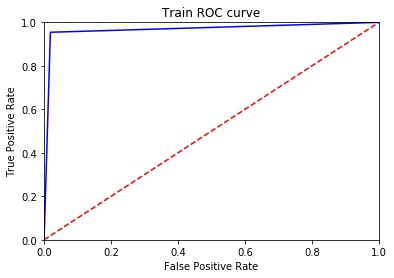

In [67]:

fpr, tpr, threshold = roc_curve(pre_target, y_pred)
df = pd.DataFrame(dict(fpr = fpr, tpr =tpr))
roc_auc = metrics.auc(fpr,tpr)

plt.title('Train ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [74]:
clr = tree.DecisionTreeRegressor()
clr = clr.fit(train,pre_target)
y_pred_r = clr.predict(train)
roc_auc_score(pre_target,y_pred_r)

0.99780497448272687

Validation

In [78]:
Valid = pd.read_csv('Task2_Validation_Data_pro.csv', low_memory = False, delimiter =',')
pre_target_V = Valid['Pred_Target'].values
Valid.drop(['Buy_sesID'], axis =1, inplace = True)
Valid.drop(['Unnamed: 0'], axis =1, inplace = True)
Valid.drop(['Pred_Target'], axis =1, inplace = True)
Valid.head()

,Cli_ItemID,ttl_Cli,AVG_CLI,Item_CLI,Fre_Cli_Itm,IN_Fre_Ctg,Cli_Wd,Cli_T,Dur_Sec,Cli_buy,Item_bought_P90,Fir_Cli,Las_Cli,Item_avg_pric,AVG_Pric,Pri_ctg_P90,below_ctg_avg_pric,below_ctg_P90
0,214854358.0,5.0,2.5,2.0,0.0,1.0,4.0,3.0,149.0,3.0,1.0,1.0,1.0,1360.0,1923.025449,4920.6,1.0,1.0
1,214859126.0,5.0,2.5,3.0,1.0,1.0,4.0,3.0,946.0,3.0,1.0,1.0,1.0,1570.0,1923.025449,4920.6,1.0,1.0
2,214712244.0,3.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,1.0,1.0,1.0,1.0,947.0,2061.555292,48380.5,1.0,1.0
3,214676480.0,3.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,1.0,1.0,1.0,1.0,5538.0,2061.555292,48380.5,0.0,1.0
4,214690839.0,3.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,1.0,0.0,0.0,0.0,686.0,2061.555292,48380.5,1.0,1.0


In [80]:
Valid['Cli_ItemID'] = Valid['Cli_ItemID'].astype('category')
Valid['Fre_Cli_Itm'] = Valid['Fre_Cli_Itm'].astype('category')
Valid['IN_Fre_Ctg'] = Valid['IN_Fre_Ctg'].astype('category')
Valid['Cli_Wd'] = Valid['Cli_Wd'].astype('category')
Valid['Cli_T'] = Valid['Cli_T'].astype('category')
Valid['Cli_buy'] = Valid['Cli_buy'].astype('category')
Valid['Item_bought_P90'] = Valid['Item_bought_P90'].astype('category')
Valid['Fir_Cli'] = Valid['Fir_Cli'].astype('category')
Valid['Las_Cli'] = Valid['Las_Cli'].astype('category')
Valid['below_ctg_avg_pric'] = Valid['below_ctg_avg_pric'].astype('category')
Valid['below_ctg_P90'] = Valid['below_ctg_P90'].astype('category')
Valid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55704 entries, 0 to 55703
Data columns (total 18 columns):
Cli_ItemID            55704 non-null category
ttl_Cli               55704 non-null float64
AVG_CLI               55704 non-null float64
Item_CLI              55704 non-null float64
Fre_Cli_Itm           55704 non-null category
IN_Fre_Ctg            55704 non-null category
Cli_Wd                55704 non-null category
Cli_T                 55704 non-null category
Dur_Sec               55704 non-null float64
Cli_buy               55704 non-null category
Item_bought_P90       55704 non-null category
Fir_Cli               55704 non-null category
Las_Cli               55704 non-null category
Item_avg_pric         55704 non-null float64
AVG_Pric              55704 non-null float64
Pri_ctg_P90           55704 non-null float64
below_ctg_avg_pric    55704 non-null category
below_ctg_P90         55704 non-null category
dtypes: category(11), float64(7)
memory usage: 4.0 MB


In [83]:
y_pred_V = clr.predict(Valid)


In [84]:
roc_auc_score(pre_target_V,y_pred_V)

0.6543267827895396

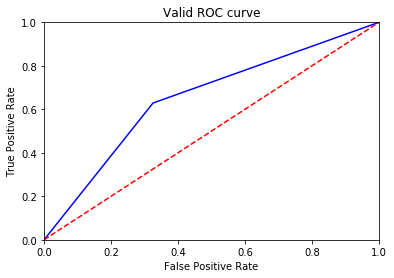

In [72]:
fpr, tpr, threshold = roc_curve(pre_target_V, y_pred_V)
df = pd.DataFrame(dict(fpr = fpr, tpr =tpr))
roc_auc = metrics.auc(fpr,tpr)

plt.title('Valid ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [85]:
 from sklearn.ensemble import RandomForestClassifier

In [92]:
m = RandomForestClassifier(max_depth = 2, random_state = 0)
m.fit(train,pre_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [93]:
print(m.feature_importances_)

[ 0.07370028  0.10277366  0.          0.          0.10964021  0.00789419
  0.          0.          0.15475748  0.10726663  0.02752174  0.16883883
  0.23194983  0.          0.00323606  0.01242109  0.          0.        ]


In [94]:
y_pred = m.predict(train)

In [95]:
roc_auc_score(pre_target,y_pred)

0.67197675840828508

Validation

In [96]:
y_pred_V = m.predict(Valid)

In [98]:
roc_auc_score(pre_target_V,y_pred_V)

0.67510600597537795